In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/linkedin-job-postings/job_postings.csv
/kaggle/input/linkedin-job-postings/company_details/companies.csv
/kaggle/input/linkedin-job-postings/company_details/company_industries.csv
/kaggle/input/linkedin-job-postings/company_details/company_specialities.csv
/kaggle/input/linkedin-job-postings/company_details/employee_counts.csv
/kaggle/input/linkedin-job-postings/job_details/benefits.csv
/kaggle/input/linkedin-job-postings/job_details/job_skills.csv
/kaggle/input/linkedin-job-postings/job_details/job_industries.csv
/kaggle/input/linkedin-job-postings/job_details/salaries.csv
/kaggle/input/linkedin-job-postings/maps/industries.csv
/kaggle/input/linkedin-job-postings/maps/skills.csv


In [2]:
#Load dataset
d = pd.read_csv('/kaggle/input/linkedin-job-postings/job_postings.csv')

In [3]:
#First 5 rows
d.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",...,NaN,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",...,NaN,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,...,NaN,Mid-Senior level,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346


In [4]:
#Check the types
d.dtypes

job_id                          int64
company_id                    float64
title                          object
description                    object
max_salary                    float64
med_salary                    float64
min_salary                    float64
pay_period                     object
formatted_work_type            object
location                       object
applies                       float64
original_listed_time          float64
remote_allowed                float64
views                         float64
job_posting_url                object
application_url                object
application_type               object
expiry                        float64
closed_time                   float64
formatted_experience_level     object
skills_desc                    object
listed_time                   float64
posting_domain                 object
sponsored                       int64
work_type                      object
currency                       object
compensation

In [5]:
# Check how many null values are in the dataset
d.isna().sum()

job_id                            0
company_id                      654
title                             0
description                       1
max_salary                    22135
med_salary                    31005
min_salary                    22135
pay_period                    19894
formatted_work_type               0
location                          0
applies                       17008
original_listed_time              0
remote_allowed                28444
views                          7360
job_posting_url                   0
application_url               12250
application_type                  0
expiry                            0
closed_time                   32074
formatted_experience_level     9181
skills_desc                   32909
listed_time                       0
posting_domain                13558
sponsored                         0
work_type                         0
currency                      19894
compensation_type             19894
scraped                     

In [6]:
d.shape

(33246, 28)

In [7]:
# Drop the columns that has the most Null values
to_drop = ['max_salary',
           'med_salary',
           'min_salary',
           'pay_period',
           'applies',
           'remote_allowed',
           'views',
           'application_url',
           'closed_time',
           'formatted_experience_level',
           'skills_desc',
           'posting_domain',
           'currency',
           'compensation_type']
d.drop(to_drop, inplace=True, axis=1)

In [8]:
d.head()

,job_id,company_id,title,description,formatted_work_type,location,original_listed_time,job_posting_url,application_type,expiry,listed_time,sponsored,work_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,Full-time,"Little River, SC",1.699090e+12,https://www.linkedin.com/jobs/view/3757940104/...,OffsiteApply,1.701680e+12,1.699090e+12,0,FULL_TIME,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,Full-time,"Beaver Dam, WI",1.699080e+12,https://www.linkedin.com/jobs/view/3757940025/...,OffsiteApply,1.701680e+12,1.699080e+12,0,FULL_TIME,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,Full-time,"Bessemer, AL",1.699080e+12,https://www.linkedin.com/jobs/view/3757938019/...,OffsiteApply,1.701680e+12,1.699080e+12,0,FULL_TIME,1699085644
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,Full-time,"Aliso Viejo, CA",1.699080e+12,https://www.linkedin.com/jobs/view/3757938018/...,OffsiteApply,1.701680e+12,1.699080e+12,0,FULL_TIME,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",Full-time,United States,1.698970e+12,https://www.linkedin.com/jobs/view/3757937095/...,OffsiteApply,1.701680e+12,1.699090e+12,0,FULL_TIME,1699085346


### Drop the null values in axis 0

In [9]:
d.dropna(axis =0, inplace= True)

### Check if there's more nulls in the data

In [10]:
# Check how many Null values still in the data
d.isna().sum()

job_id                  0
company_id              0
title                   0
description             0
formatted_work_type     0
location                0
original_listed_time    0
job_posting_url         0
application_type        0
expiry                  0
listed_time             0
sponsored               0
work_type               0
scraped                 0
dtype: int64

In [11]:
# check the number of rows and columns in the dataset after dropping the columns
d.shape

(32591, 14)

In [12]:
len(d.columns)

14

### View the columns

In [13]:
d.columns

Index(['job_id', 'company_id', 'title', 'description', 'formatted_work_type',
       'location', 'original_listed_time', 'job_posting_url',
       'application_type', 'expiry', 'listed_time', 'sponsored', 'work_type',
       'scraped'],
      dtype='object')

In [14]:
len(d)

32591

### Taking the first 10 job titles from the data

In [15]:
s = d['title'].value_counts().head(10)

### Visulize the 10 job titles

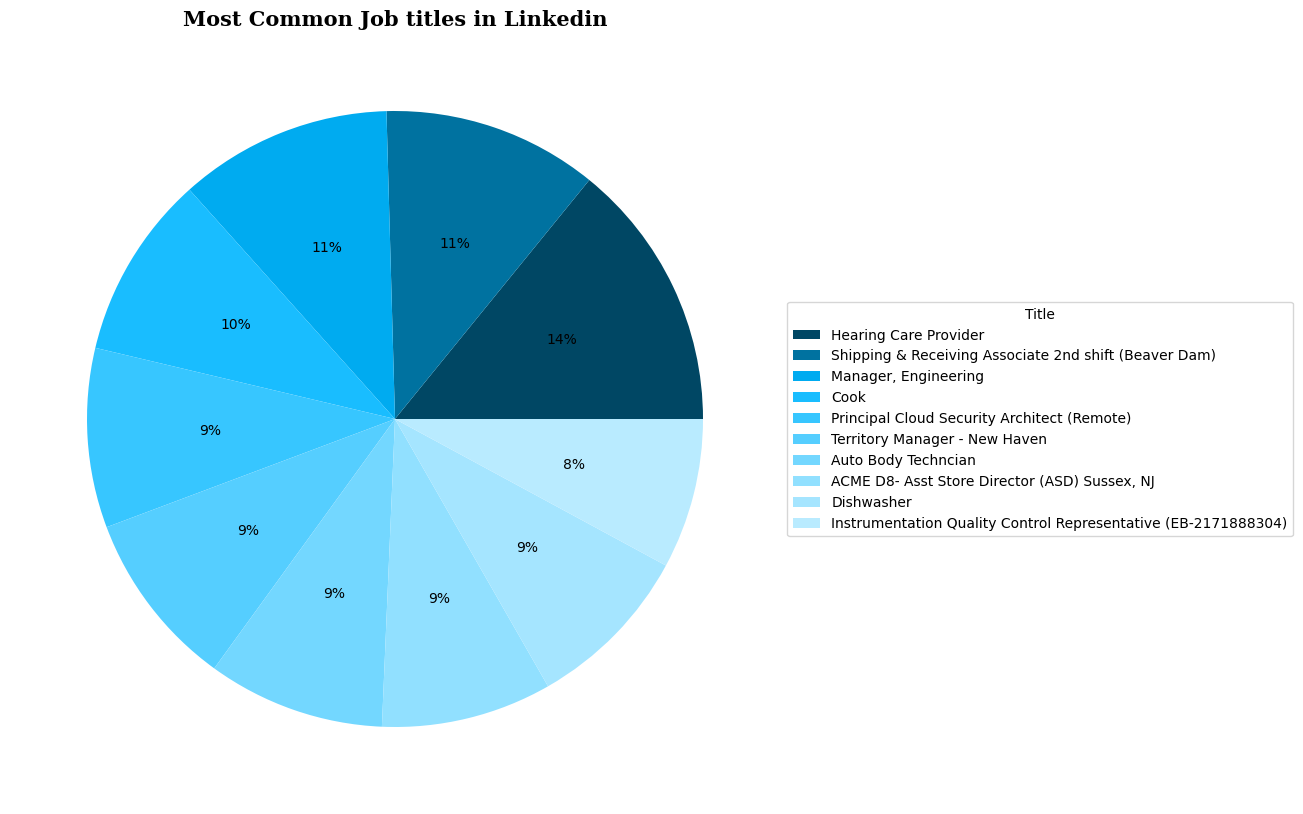

In [16]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
c = ['#004764','#0072A0','#00ABF0', '#19BDFF', '#37C6FF','#55CEFF','#73D7FF','#91E0FF','#A5E5FF','#B9EBFF']

plt.pie(s, autopct = '%1.0f%%',colors = c)

ax.legend(d.title,
          title='Title',
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1)
)
ax.set_title('Most Common Job titles in Linkedin', fontfamily='serif', fontsize=15,fontweight='bold')

# Show Plot
plt.show()

### Taking the 10th locations from the data and count the number of job posting in each location.

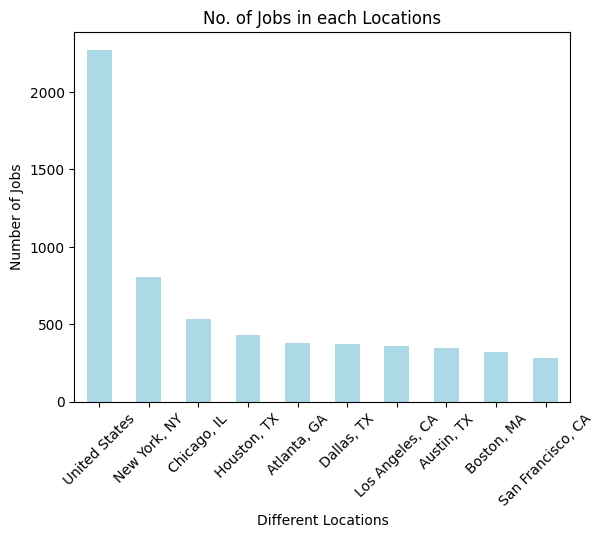

In [17]:

d['location'].value_counts().head(10).plot(kind = 'bar', color = 'lightblue')
ax.invert_yaxis()
plt.rcParams['figure.figsize'] = (10, 5)
plt.ylabel('Number of Jobs')
plt.xlabel('Different Locations')
plt.xticks(rotation = 45)
plt.title('No. of Jobs in each Locations', fontsize =12)
plt.show()

